# Worldwide obesity data analysis
Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

In [373]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Perguntas - Obesity among adults by country, 1975-2016

In [254]:
df_obesity = pd.read_csv('dataset/obesity_cleaned.csv')
df_obesity['Obesity (%)'].iloc[0].split()

['0.5', '[0.2-1.1]']

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [255]:
# Deletando a coluna não importante para analise
del df_obesity['Unnamed: 0']

In [256]:
df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split()[0])
df_obesity.loc[df_obesity['Obesity'] == "No", "Obesity"] = np.nan
df_obesity['Obesity'] = df_obesity['Obesity'].dropna()
df_obesity['Obesity'] = df_obesity['Obesity'].apply(lambda x: float(x))
df_obesity['Year'] = df_obesity['Year'].apply(lambda x: int(x))


In [257]:
df_obesity.set_index("Year", inplace=True)
df_obesity

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [258]:
df_obesity[df_obesity.index == 2015].groupby("Sex")[['Obesity']].mean()

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [259]:
# Construindo a formula do intervalo de inicio ao fim
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

# Após a formula, colococando como indice os paises "Country"
df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)


df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]


In [260]:
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [261]:
df_obesity_ev.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

In [262]:
df_obesity_end[df_obesity_end.index == "Tuvalu"]

,Obesity (%),Sex,Obesity
Country,,,
Tuvalu,51.6 [45.0-57.9],Both sexes,51.6
Tuvalu,47.0 [37.7-56.4],Male,47.0
Tuvalu,56.2 [47.3-64.4],Female,56.2


- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [263]:
df_2015 = df_obesity[df_obesity.index == 2015]

In [264]:
df_2015[df_2015['Obesity'] == df_2015['Obesity'].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [265]:
df_2015[df_2015['Obesity'] == df_2015['Obesity'].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

<Axes: xlabel='Year'>

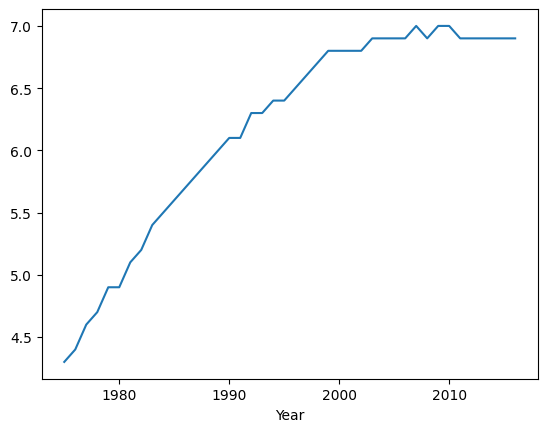

In [266]:
df_brasil = df_obesity[df_obesity['Country'] == 'Brazil']
(df_brasil[df_brasil["Sex"] == 'Female']['Obesity'] - df_brasil[df_brasil['Sex'] == 'Male']['Obesity']).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [267]:
df_both = df_obesity[df_obesity["Sex"] == "Both sexes"]

<Axes: xlabel='Year'>

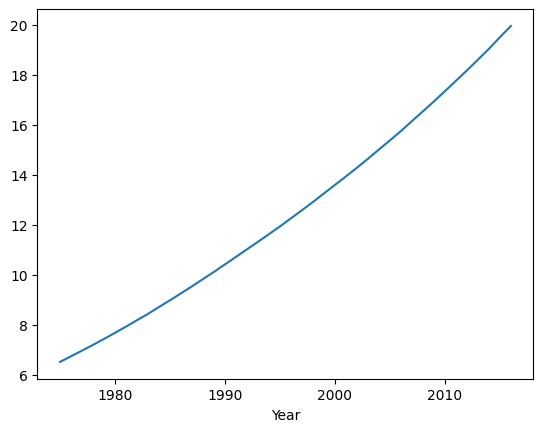

In [268]:
df_both.groupby("Year")['Obesity'].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [344]:
df_gdp = pd.read_csv('dataset/gdp.csv', thousands=",")
df_gdp.head(5)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [345]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   4419 non-null   object 
 1   Region    4419 non-null   object 
 2   Year      4419 non-null   object 
 3    GDP_pp   4419 non-null   float64
dtypes: float64(1), object(3)
memory usage: 138.2+ KB


In [346]:
df_gdp['Year'].iloc[0]

'1/1/1901'

In [347]:
df_gdp[' GDP_pp '].iloc[0]

np.float64(613.99)

In [348]:
# Convertendo a coluna Year em data
df_gdp['Year'] = pd.to_datetime(df_gdp['Year'])
df_gdp['Year'] = df_gdp['Year'].dt.year.astype(int)
df_gdp['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4419 entries, 0 to 4418
Series name: Year
Non-Null Count  Dtype
--------------  -----
4419 non-null   int64
dtypes: int64(1)
memory usage: 34.7 KB


In [349]:
# Corrigindo as colunas que tiver espaço no final
df_gdp.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

In [350]:
df_gdp.rename(columns=lambda x: x.strip(), inplace=True)
df_gdp.columns

Index(['Country', 'Region', 'Year', 'GDP_pp'], dtype='object')

- Você conseguiria informar o primeiro valor registrado de cada país?

In [351]:
df_gdp.groupby("Country")["Year"].min()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [352]:
df_gdp.groupby("Country")["Year"].min().value_counts()


Year
1901    192
1991      1
Name: count, dtype: int64

In [353]:
df_gdp.groupby("Country")["Year"].min()[df_gdp.groupby("Country")["Year"].min() == 1991]


Country
Kosovo    1991
Name: Year, dtype: int64

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [354]:
df_gdp[df_gdp['Year'] < 2000].max()

Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
GDP_pp               118681.3
dtype: object

In [355]:
df_gdp_start = df_gdp[df_gdp['Year'] == 1901]
df_gdp_end = df_gdp[df_gdp['Year'] == 1996]


In [356]:
(df_gdp_end.groupby("Region")['GDP_pp'].mean() / df_gdp_start.groupby("Region")['GDP_pp'].mean() -1)* 100

Region
Asia                                             711.761516
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
Europe                                           594.046167
Middle East, North Africa, and Greater Arabia    857.215950
North America                                    589.760175
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: GDP_pp, dtype: float64

In [357]:
((df_gdp_end.groupby("Region")['GDP_pp'].mean() / df_gdp_start.groupby("Region")['GDP_pp'].mean() -1)* 100).sort_values()


Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: GDP_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [358]:
array_year = np.arange(df_gdp['Year'].min(), df_gdp['Year'].max())
array_year

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [359]:
df_all_year = pd.DataFrame(array_year, columns=["Year"])
df_all_year.index = df_all_year['Year']
df_all_year

,Year
Year,
1901,1901
1902,1902
1903,1903
1904,1904
1905,1905
...,...
2006,2006
2007,2007
2008,2008


In [360]:
df_year_off = ~df_all_year['Year'].isin(df_gdp['Year'])
df_year_off

Year
1901    False
1902     True
1903     True
1904     True
1905     True
        ...  
2006    False
2007     True
2008     True
2009     True
2010     True
Name: Year, Length: 110, dtype: bool

In [361]:
df_year_off = df_all_year.loc[df_year_off].index
df_year_off


Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int64', name='Year')

In [362]:
df_gdp = df_gdp.sort_values(["Country", "Year"])
df_gdp['delta_gdb'] = df_gdp['GDP_pp'] - df_gdp['GDP_pp'].shift(1)
df_gdp['delta_year'] = df_gdp['Year'] - df_gdp['Year'].shift(1)
df_gdp['gdb_year'] = (df_gdp['delta_gdb'] / df_gdp['delta_year']).shift(-1)
df_gdp

,Country,Region,Year,GDP_pp,delta_gdb,delta_year,gdb_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232


In [363]:
df_gdp['next_year'] = df_gdp["Year"].shift(-1)
del df_gdp['delta_gdb'], df_gdp['delta_year']
df_gdp.head(5)

,Country,Region,Year,GDP_pp,gdb_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [364]:
row.to_frame().transpose()

,Country,Region,Year,GDP_pp,gdb_year,next_year
4418,Zimbabwe,Sub-Saharan Africa,2011,526.33,NaN,NaN


In [365]:
df_new_data = pd.DataFrame()
for idx, row in df_gdp.iterrows():
    if row['Year'] == 2011:
        continue
    years_to_add = df_year_off[(df_year_off < row['next_year']) & (df_year_off > row['Year'])] 
    
    for new_year in years_to_add:
        add_row = row.copy()
        add_row['GDP_pp'] = (new_year - add_row['Year']) * add_row['gdb_year'] + add_row['GDP_pp']
        add_row['Year'] = new_year
        add_row['kind'] = 'estimated'
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])
        
        

In [366]:
#del df_new_data['delta_year'], df_new_data['delta_gdb']

In [367]:
df_new_data

,Country,Region,Year,GDP_pp,gdb_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [368]:

df_gdp = pd.concat([df_gdp, df_new_data])
df_gdp.sort_values(['Country', 'Year'], inplace=True)
df_gdp.index = df_gdp['Year']
df_gdp

,Country,Region,Year,GDP_pp,gdb_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [370]:
df_gdp['kind'].fillna('real', inplace=True)
df_gdp

,Country,Region,Year,GDP_pp,gdb_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


<Axes: xlabel='Year', ylabel='GDP_pp'>

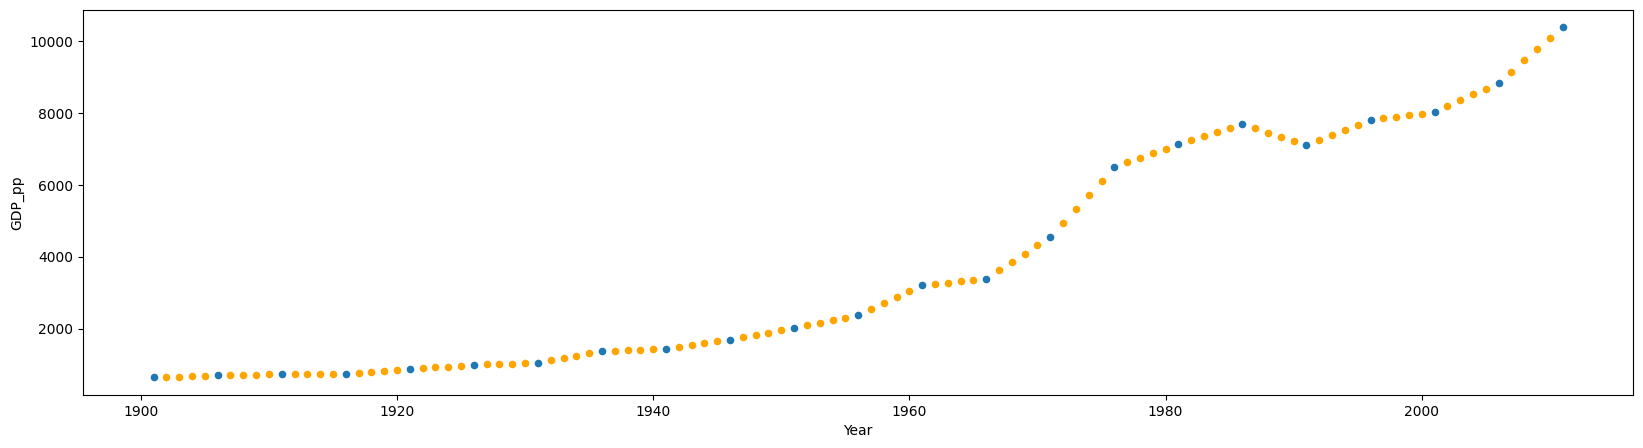

In [372]:
fig, ax = plt.subplots(figsize=(20,5))

contry = 'Brazil'
df_gdp[(df_gdp['kind'] == 'real') & (df_gdp['Country'] == contry)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax)
df_gdp[(df_gdp['kind'] == 'estimated') & (df_gdp['Country'] == contry)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax, color='orange')

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [376]:
df_gdp['Year'] = df_gdp['Year'].astype(int)
df_gdp['GDP_pp'] = df_gdp['GDP_pp'].astype(float)


In [377]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [387]:
dict_iso_alpha = df.set_index('country').to_dict()['iso_alpha']

In [386]:
dict_num = {j: i for i, j in enumerate(df_gdp['Country'].unique())}

In [391]:
df_gdp['iso_alpha'] = df_gdp['Country'].map(dict_iso_alpha)
df_gdp['iso_num'] = df_gdp['Country'].map(dict_num)

fig = px.choropleth(df_gdp[df_gdp['kind'] == 'real'].reset_index(drop=True), locations="iso_alpha", color='GDP_pp', hover_name='Country', animation_frame='Year')

fig.update_layout(height=600)
fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [396]:
df_obesity

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


In [397]:
df_gdp.head(5)

,Country,Region,Year,GDP_pp,gdb_year,next_year,kind,iso_alpha,iso_num
Year,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real,AFG,0
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.00,2.01,1906.0,estimated,AFG,0
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated,AFG,0
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated,AFG,0
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated,AFG,0


In [ ]:
df_obesity['country-year'] = df_obesity['Country'] + "-" + df_obesity.reset_index()['Year'].apply(lambda x: str(int(x))).values
dict_obesity_year = df_obesity.set_index("country-year").to_dict()['Obesity']

In [404]:
df_gdp['country-year'] = df_gdp['Country'] + "-" + df_gdp['Year'].apply(lambda x: str(int(x))).values
df_gdp['Obesity'] = df_gdp['country-year'].map(dict_obesity_year)

In [410]:
df_gdp_clean = df_gdp.dropna()


In [412]:
df_gdp_clean.reset_index(drop=True).groupby("Year")[['Obesity','GDP_pp']].mean().corr()

,Obesity,GDP_pp
Obesity,1.000000,0.969378
GDP_pp,0.969378,1.000000
